___
# JOSÉ LUIS PADILLA  VALENZUELA

#### APRENDIZAJE AUTOMÁTICO

___
### Contexto
Trabajamos como científicos de datos para una empresa de retail que, debido al cambio en los hábitos de consumo de los clientes, está potenciando ampliamente el servicio de venta online. La empresa quiere realizar un modelo de aprendizaje automático para clasificar a los clientes en función de la probabilidad de generar ingresos al comprar en la web.

El objetivo es realizar una serie de acciones específicas para los clientes que es más probable que hagan compras en la web.

Para ello, la empresa ha ido recopilando datos con su herramienta de Google Analytics. Cuenta con datos de sesiones, cada una de ellas de un cliente distinto en un periodo de un año.

## Información de los datos
1) El conjunto de datos consta de 10 atributos numéricos y 8 categóricos.

2) El atributo Revenue puede ser usado como la etiqueta de la clase.

3) **Administrative, Administrative_Duration, Informational, Informational_Duration, Product_Related y Product_Related_Duration** representan el número de diferentes tipos de páginas visitadas por el visitante en esa sesión y el tiempo total dedicado a cada una de estas categorías de páginas. Los valores de estas características se derivan de la información del URL de las páginas visitadas por el usuario y se actualizan en tiempo real cuando el usuario realiza una acción, por ejemplo, pasar de una página a otra.

4) Las características **Bounce_Rate, Exit_Rate y Page_Value** representan las métricas medidas por Google Analytics para cada página del sitio de comercio electrónico.

* El valor de la característica **Bounce_Rate** de una página web se refiere al porcentaje de visitantes que entran en el sitio desde esa página y luego salen (rebote) sin activar ninguna otra solicitud al servidor de análisis durante esa sesión.

* El valor de la característica **Exit_Rate** para una página web específica se calcula como para todas las visitas a la página, el porcentaje que fueron las últimas en la sesión.

* La función **Page_Value** representa el valor medio de una página web que un usuario ha visitado antes de completar una transacción de comercio electrónico.

5) La característica de **Special_Day** indica la cercanía de la hora de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, San Valentín) en el que es más probable que las sesiones finalicen con una transacción.

El valor de este atributo se determina teniendo en cuenta la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega.

_Por ejemplo, para San Valentín, este valor toma un valor distinto de 0 entre el 2 y el 12 de febrero, 0 antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero._

6) El conjunto de datos también incluye el **sistema operativo, el navegador, la región, el tipo de tráfico, el tipo de visitante como visitante que regresa o como nuevo visitante, un valor booleano que indica si la fecha de la visita es de fin de semana, y el mes del año**.

## Se pide

1) Realización de un análisis de las variables del dataset de Google Analytics como pueden ser histogramas, boxplots, etc. Cualquier otro análisis es bienvenido, siempre explicándolo y con un sentido de negocio.

2) Tratamiento de los valores faltantes, outliers, etc., en caso de que los hubiese. Si hay valores con missings, habrá que eliminarlos con el método de Pandas llamado Dropna().a.

3) Tratamiento de categóricas, pasándolas a numéricas por medio de dummies, mapeándolas o utilizando un label encoder. Hay que justificar las operaciones que se realizan.

4) Si existe alguna variable que se necesite borrar, habrá que borrarla y justificarlo.

5) Estandarizar los datos.

6) Dividir los datos en train y en test. Con los datos de train se pretende ajustar modelos con CrossValidation y GridSearch.
* Utilizar un modelo lineal. Entre los modelos lineales están las regresiones logísticas, las regresiones lineales, etc.
* Utilizar un modelo de redes neuronales.
* Utilizar cualquier otro modelo de clasificación.

7) Optimizar algún parámetro de cada modelo utilizando CrossValidation y GridSearch, o de la forma que se estime oportuna, siempre justificándolo.

8) Elegir el mejor modelo de los tres según la métrica ROC en CrossValidation. Predecir Test y obtener una métrica estimada.

9) Umbralizar las probabilidades utilizando el umbral que maximice el área bajo la curva ROC.

10) El entregable final será un Jupyter Notebook en el que se realicen todos los análisis y los modelos.

Es un algoritmo de Aprendizaje Supervisado contamos con variables X (denominadas caracteristicas - Features) y una variable Y (denominada objetivo - Target)

Lo que se pide es un modelo end-to-end como los vistos en prácticas en el módulo.
En este caso, hay que aplicar tres modelos y escoger el mejor, pero la parte previa es común a los tres.

Se tendrán en cuenta la estructura del código, las interpretaciones y las justificaciones.
El esquema que se pone en las tareas es un esquema general. Si se necesita hacer alguna tarea, se puede llevar a cabo. También es posible aplicar cualquier otro algoritmo visto en el módulo, siempre justificando y haciendo las cosas con un sentido.

### Carga de librerías:

In [1]:
import pandas as pd # Se centrada principalmente en la manipulación y el análisis de datos.
pd.options.display.max_columns = None
import numpy as np # Se centra en la limpieza y la manipulación de los datos.
import matplotlib.pyplot as plt # Visualización de datos
import seaborn as sns # Visualización de datos
import os, sys # obtener la ruta del archivo
from sklearn.preprocessing import LabelEncoder # convierte variables categóricas en numéricas.
import sklearn as skl # aprendizaje automático
from sklearn.preprocessing import StandardScaler # Estandariza los datos.
from sklearn.model_selection import train_test_split # Divide los datos en Train y Test.
from scipy.stats import boxcox, probplot, norm, shapiro # Aprendizaje automático con distintas funcionalidades 
# de optimización, algebra lineal, integraciones y estadística.
from sklearn.linear_model import LogisticRegression # Regresión Logitica
from sklearn.model_selection import GridSearchCV # Permite evaluar y seleccionar de forma sistemática los parámetros de un modelo.
from sklearn.neural_network import MLPClassifier # Clasificador de Perceptrón de varias capas. 
# Optimiza la función de pérdida de registros usando LBFGS o descenso de gradiente estocástico.
from sklearn.model_selection import cross_val_score, RepeatedKFold  # Para Cross Validation
import sklearn.metrics as metrics # Implementa varias funciones de pérdida, puntuación y utilidad para medir el rendimiento de la clasificación.
import warnings # Control de advertencias.
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 500

### Definición de funciones: 

In [2]:
# Función que representa gráficos de dispersión de las variables en "X - Features" en función a la variable "Y - Target"
def relaciones_vs_target(X, Y, return_type = 'axes'):
    fig_tot = (len(X.columns))
    fig_por_fila = 4
    tamanio_fig = 4
    num_filas = int( np.ceil(fig_tot / fig_por_fila) )    
    plt.figure( figsize=( fig_por_fila * tamanio_fig + 5, num_filas * tamanio_fig + 5 ) )
    c = 0 
    for i, col in enumerate(X.columns):
        plt.subplot(num_filas, fig_por_fila, i + 1)
        sns.scatterplot(x = X[col], y = Y)
        plt.title( '%s vs %s' % (col, 'target') )
        plt.ylabel('Target')
        plt.xlabel(col)
    plt.show()

# Función que recibe dos distribuciones de probabilidad y las representa en el mismo gráfico.
def represento_doble_hist(x_1, x_0, n_bins = 11, title = '', label_1 = 'Clase 1', 
                          label_0 = 'Clase 0', density = 0):
    bins = n_bins
    plt.hist(x_1, bins, density = density, alpha = 0.5, label = label_1, color = 'red')    
    plt.hist(x_0, bins, density = density, alpha = 0.5, label = label_0, color = 'green')
    plt.title(title)
    plt.legend(loc = 'best') 

# Representa las variables en "X - Features" divididas en dos distribuciones según su valor de "Y - Target" sea "1 o 0"
def hist_pos_neg_feat(x, y, density = 0, nbins = 11, targets = (0,1)):
    fig_tot = len(x.columns)
    fig_tot_fila = 4; fig_tamanio = 4
    num_filas = int( np.ceil(fig_tot / fig_tot_fila) )
    plt.figure( figsize = ( fig_tot_fila * fig_tamanio + 2, num_filas * fig_tamanio + 2 ) )
    target_neg, target_pos = targets
    for i, feat in enumerate(x.columns):
        plt.subplot(num_filas, fig_tot_fila, i+1);
        plt.title('%s' % feat)
        idx_pos = y == target_pos
        idx_neg = y == target_neg
        represento_doble_hist(x[feat][idx_pos].values, x[feat][idx_neg].values, nbins, 
                   density = density, title = ('%s' % feat))

def represento_historico(historico):
    hist = pd.DataFrame(historico.history)
    hist['epoch'] = historico.epoch
    plt.figure(figsize=(15,7))
    plt.xlabel('Epoch')
    plt.ylabel('Error absoluto medio [MAE]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Error de entrenamiento')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Error de validación')
    plt.title('Error MAE en entrenamiento y en test')
    plt.ylim([0,5])
    plt.legend()

    plt.figure(figsize=(15,7))
    plt.xlabel('Epoch')
    plt.ylabel('Error cuadrático medio [MSE]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Error de entrenamiento')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Error de validación')
    plt.title('Error MSE en entrenamiento y en test')
    plt.ylim([0,20])
    plt.legend()
    plt.show()
    
# Función para comprobar la normalidad.
def comprueba_normalidad(df, return_type='axes', title='Comprobación de normalidad'):
    fig_tot = (len(df.columns))
    fig_por_fila = 3
    tamanio_fig = 4
    num_filas = int( np.ceil(fig_tot/fig_por_fila) )    
    plt.figure( figsize=( fig_por_fila*tamanio_fig+5, num_filas*tamanio_fig+2 ) )
    c = 0 
    shapiro_test = {}
    lambdas = {}
    for i, col in enumerate(df.columns):
        ax = plt.subplot(num_filas, fig_por_fila, i+1)
        probplot(x = df[df.columns[i]], dist=norm, plot=ax)
        plt.title(df.columns[i])
        shapiro_test[df.columns[i]] = shapiro(df[df.columns[i]])
    plt.suptitle(title)
    plt.show()
    shapiro_test = pd.DataFrame(shapiro_test, index=['Test Statistic', 'p-value']).transpose()
    return shapiro_test

# Función que representa gráficos de dispersión de las Features "X" en función de la Target "Y"
def rel_vs_target_reg(x, y, return_type = 'axes'):
    fig_tot = (len(x.columns))
    fig_por_fila = 3
    tamanio_fig = 4
    num_filas = int( np.ceil(fig_tot / fig_por_fila) )    
    plt.figure( figsize = ( fig_por_fila * tamanio_fig + 5, num_filas * tamanio_fig + 5 ) )
    c = 0 
    for i, col in enumerate(x.columns):
        plt.subplot(num_filas, fig_por_fila, i + 1)
        sns.regplot(x = x[col], y = y)
        plt.title( '%s vs %s' % (col, 'target') )
        #plt.ylabel('Target')
        #plt.xlabel(col)
    plt.show()

## Carga de datos:

In [3]:
# Leemos el dataframe
dfShoppers = pd.read_csv('.../online_shoppers_intention.csv', sep = ',', index_col = False)

# Comprobamos el tamaño del dataframe
dfShoppers.shape

(12330, 18)

In [4]:
# El DataFrame consta de 10 variables numéricas y 8 categóricas.
dfShoppers.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Procesamiento de datos 
Tratamiento de los valores faltantes, outliers, etc. 

_Etapa de preparacion de datos_

In [5]:
# Vimos en el anterior punto que 14 de las 12.330 filas tenian VALORES FALTANTES
# en 7 de las 18 columnas por lo cual vamos a eliminar estas al no ser de mayor importancia por su reducido numero e incidencia en el DataFrame.
dfShoppers = dfShoppers.dropna()
dfShoppers.shape

(12316, 18)

In [6]:
# Ahora vemos que todo el DataFrame NO TIENE VALORES FALTANTES NI NULOS.
# Por tanto podemos decir que la información es VALIDA e INTEGRA y vamos a suponer con fines didácticos que es ACTUAL.
dfShoppers.isnull().sum().sum()

0

## Tratamiento de categóricas pasándolas a numéricas
Es necesario convertir las variables categóricas a numéricas de cara a introducirlas en los modelos

_Etapa de preparacion de datos_

In [7]:
# Lista de las variables categóricas
dfShoppers.select_dtypes(exclude = ['number']).columns

Index(['Month', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')

Vemos claramente que tenemos 4 variables categóricas _(Month, VisitorType, Weekend y Revenue)_ las cuales las pasaremos a numéricas con **"LabelEncoder"**

También tenemos otras 4 _(OperatingSystems, Browser, Region y TrafficType)_ que aunque se presentan como numéricas realmente son categóricas.

Con estas utilizaremos el metodo de **"dummies"**.

In [8]:
# Con la librería LabelEncoder convertimos las variables categóricas en numéricas.
le = LabelEncoder()

In [9]:
dfShoppers['Revenue'].value_counts()

False    10408
True      1908
Name: Revenue, dtype: int64

In [10]:
# La variable categórica Renueve la convertimos en numérica.
dfShoppers['Revenue'] = le.fit_transform(dfShoppers['Revenue'])
dfShoppers['Revenue'].value_counts()

0    10408
1     1908
Name: Revenue, dtype: int64

In [11]:
dfShoppers['VisitorType'].value_counts()

Returning_Visitor    10537
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [12]:
# Codificamos las muestras Returning_Visitor con 1 y agrupamos New_Visitor y Other con 0
dfShoppers.loc[dfShoppers.VisitorType != 'Returning_Visitor', 'VisitorType'] = 0
dfShoppers.loc[dfShoppers.VisitorType == 'Returning_Visitor', 'VisitorType'] = 1
dfShoppers.rVisitorType = dfShoppers.VisitorType.astype(int)

In [13]:
dfShoppers['VisitorType'].value_counts()

1    10537
0     1779
Name: VisitorType, dtype: int64

In [14]:
dfShoppers['Month'].value_counts()

May     3363
Nov     2998
Mar     1894
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [15]:
# La variable categórica Month la convertimos en numérica.
dfShoppers['Month'] = le.fit_transform(dfShoppers['Month'])
dfShoppers['Month'].value_counts()

6    3363
7    2998
5    1894
1    1727
8     549
9     448
0     433
3     432
4     288
2     184
Name: Month, dtype: int64

In [16]:
dfShoppers['Weekend'].value_counts()

False    9451
True     2865
Name: Weekend, dtype: int64

In [17]:
# La variable categórica Weekend la convertimos en numérica.
dfShoppers['Weekend'] = le.fit_transform(dfShoppers['Weekend'])
dfShoppers['Weekend'].value_counts()

0    9451
1    2865
Name: Weekend, dtype: int64

In [18]:
# Creamos este DataFrame temporal para algunos gráficos
df1 = dfShoppers[['OperatingSystems', 'Browser', 'Region', 'TrafficType']].copy()

In [19]:
# Convertimos las 4 variables categóricas en numéricas por medio de Dummies.
# Recordamos que estas variables tienen valores numericos pero realmente son variables categoricas.
dfS = dfShoppers = pd.get_dummies(dfShoppers,columns=['OperatingSystems','Browser','Region','TrafficType'],drop_first=True)

Se han creado muchas variables **Dummies** las cuales las vamos a integrar para que queden solo 4 nuevamente y un DataFrame de 18 columnas.

In [20]:
# Vemos el tamaño del DataFrame "dfS"
dfS.shape

(12316, 60)

In [21]:
# Creamos un nuevo DataFrame "dfDum" con todas las variables incluyendo las Dummies.
dfDum = dfS[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'VisitorType', 'Weekend', 'Revenue', 'OperatingSystems_2',
       'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5',
       'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8',
       'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6',
       'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11',
       'Browser_12', 'Browser_13', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5',
       'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType_9',
       'TrafficType_10', 'TrafficType_11', 'TrafficType_12', 'TrafficType_13',
       'TrafficType_14', 'TrafficType_15', 'TrafficType_16', 'TrafficType_17',
       'TrafficType_18', 'TrafficType_19', 'TrafficType_20']].copy()

In [22]:
# Integramos las 7 variables OperatingSystems en 1 sola.
dfDum['OperatingSystems'] = dfDum['OperatingSystems_2'].astype(object) + dfDum['OperatingSystems_3'] + dfDum['OperatingSystems_4'] + dfDum['OperatingSystems_5'] + dfDum['OperatingSystems_6']+ dfDum['OperatingSystems_7'] + dfDum['OperatingSystems_8']

In [23]:
# Integramos las 12 variables Browser en 1 sola.
dfDum['Browser'] = dfDum['Browser_2'].astype(object) + dfDum['Browser_3'] + dfDum['Browser_4'] + dfDum['Browser_5'] + dfDum['Browser_6'] + dfDum['Browser_7'] + dfDum['Browser_8'] + dfDum['Browser_9'] + dfDum['Browser_10'] + dfDum['Browser_11'] + dfDum['Browser_12'] + dfDum['Browser_13']

In [24]:
# Integramos las 8 variables Region en 1 sola.
dfDum['Region'] = dfDum['Region_2'].astype(object) + dfDum['Region_3'] + dfDum['Region_4'] + dfDum['Region_5'] + dfDum['Region_6'] + dfDum['Region_7'] + dfDum['Region_8'] + dfDum['Region_9']

In [25]:
# Integramos las 19 variables TrafficType en 1 sola.
dfDum['TrafficType'] = dfDum['TrafficType_2'].astype(object) + dfDum['TrafficType_3'] + dfDum['TrafficType_4'] + dfDum['TrafficType_5'] + dfDum['TrafficType_6'] + dfDum['TrafficType_7'] + dfDum['TrafficType_8'] + dfDum['TrafficType_9'] + dfDum['TrafficType_10'] + dfDum['TrafficType_11'] + dfDum['TrafficType_12'] + dfDum['TrafficType_13'] + dfDum['TrafficType_14'] + dfDum['TrafficType_15'] + dfDum['TrafficType_16'] + dfDum['TrafficType_17'] + dfDum['TrafficType_18'] + dfDum['TrafficType_19'] + dfDum['TrafficType_20']

In [26]:
# Creamos un nuevo Dataframe "dfDum1" eliminando todas las dummies que ya están inegradas.
dfDum1 = dfDum[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'VisitorType', 'Weekend', 'Revenue', 'OperatingSystems', 'Browser',
       'Region','TrafficType']].copy()

In [27]:
dfDum1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Weekend,Revenue,OperatingSystems,Browser,Region,TrafficType
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,1,0,0,1,1,0,1
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,1,0,0,1,0,1,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,1,0,0,1,1,1,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,1,1,0,1,1,0,1


Vemos que existen algunos valores negativos _"-1"_ que no tendrían sentido en nuestro DataFrame ya que corresponderían a duraciones negativas de tiempo y esto _no tiene ningún sentido_.

In [28]:
# No puede existir duración de tiempo negativa "-1" por tanto los vamos a remplazar con el valor "0".
df = dfDum1.replace({-1: 0})
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Weekend,Revenue,OperatingSystems,Browser,Region,TrafficType
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,1,0,0,1,1,0,1
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,0,0,1,0,1,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,1,0,0,1,1,1,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,1,1,0,1,1,0,1


In [29]:
# Comprobación tipos no numéricos:
df.select_dtypes(exclude = ['number']).columns

Index([], dtype='object')

### Dividimos las variables en Features **" X "** y Target **" Y "**

In [30]:
# Eliminamos la columna Revenue de "X" ya que es la que utilizaremos como "Etiqueta de Clase". 
# Dividimos los datos en features y target.
X = df.drop(['Revenue'], axis = 1)
Y = df['Revenue']

# Revisamos las medidas
print('Features X:', X.shape)
print('Target Y:', Y.shape)

Features X: (12316, 17)
Target Y: (12316,)


## Análisis de las variables del DataFrame. 
#### Visualizaciones y correlaciones.
_Etapa de prepacacion de datos_.

In [31]:
# Describimos el DataFrame.
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Weekend,Revenue,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.317798,80.908856,0.503979,34.509067,31.763884,1196.039736,0.022152,0.043003,5.895952,0.061497,5.164095,0.855554,0.232624,0.154920,0.790354,0.800341,0.612374,0.801559
std,3.322754,176.859199,1.270701,140.824813,44.490339,1914.370836,0.048427,0.048527,18.577926,0.199020,2.371528,0.351556,0.422522,0.361844,0.407072,0.399760,0.487228,0.398842
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
# Revisamos el porcentaje de los valores nulos del DataFrame.
perc_nulos = (df.isnull().sum() / df.shape[0] * 100)
print(perc_nulos)             

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
dtype: float64


Análisis univariable

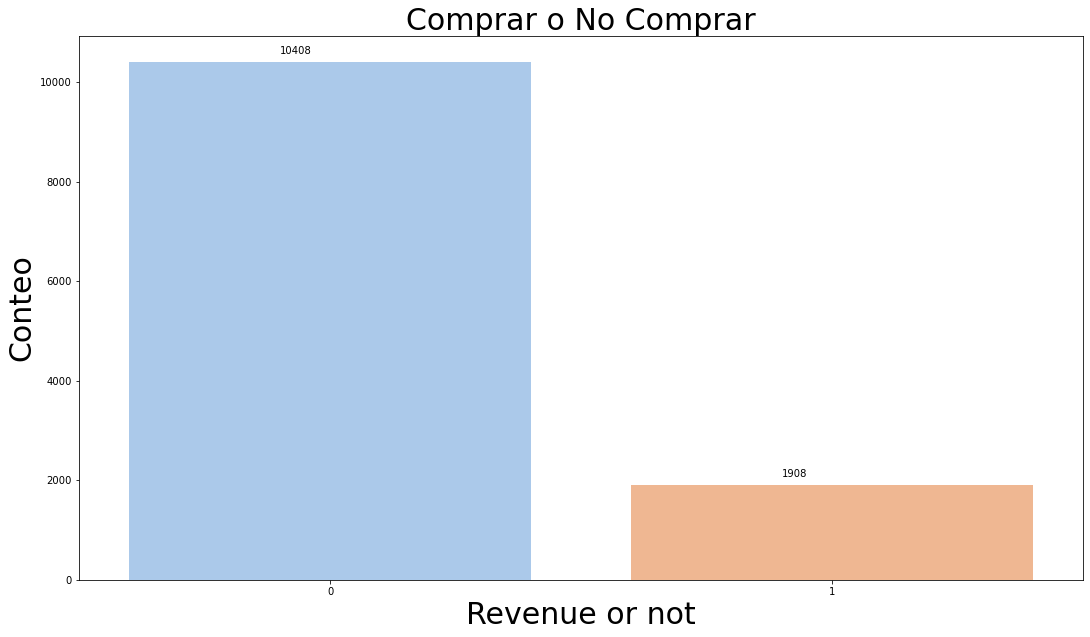

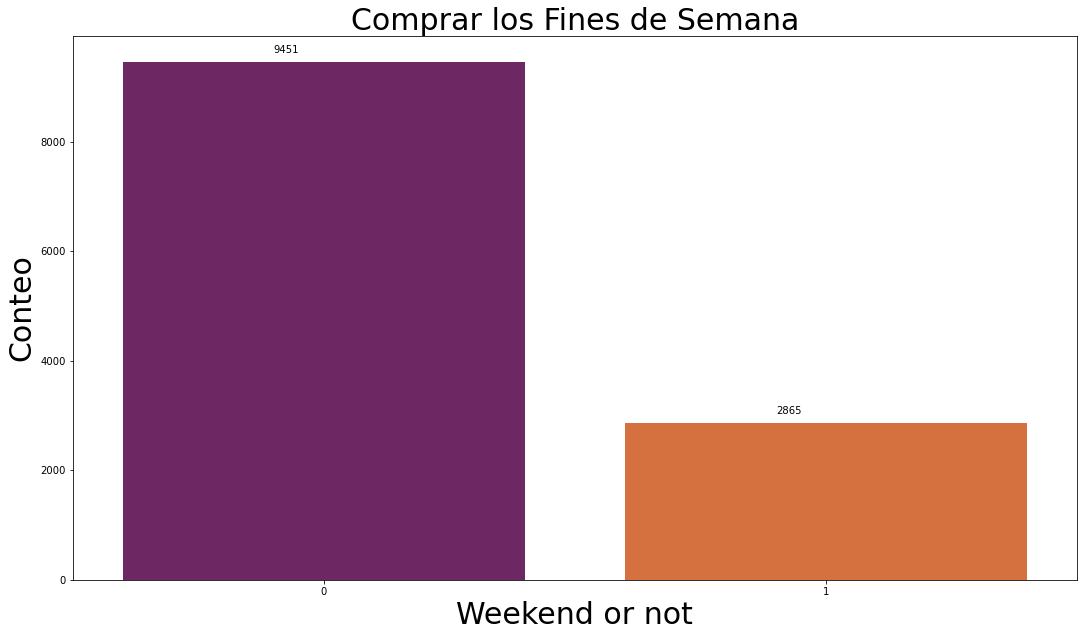

In [33]:
# Definimos "xOff" y "yOff" para los gráficos.
xOff = 1.0 # Offset de posición X
yOff = 162 # Offset de posición Y

# Distribución de la intención de los clientes de comprar o no comprar "Revenue".
plt.figure(figsize = (18,10))

RevenueEtiq = ['False', 'True']
RevenueVal = df['Revenue'].value_counts()

plt.bar(RevenueEtiq, RevenueVal, width = 0.9, align = 'center', color = 'white')
sns.countplot(df['Revenue'], palette = 'pastel')

for xOff in range(len(RevenueEtiq)):
    plt.annotate(RevenueVal[xOff], (-0.1 + xOff, RevenueVal[xOff] + yOff))
    
plt.title("Comprar o No Comprar", fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 30)
plt.ylabel('Conteo', fontsize = 30)
plt.savefig('RevenueGrafique.png')

# Distribución de clientes de comprar en fin de semana "Weekend"
plt.figure(figsize = (18,10))

WeekendEtiq = ['False', 'True']
WeekendVal = df['Weekend'].value_counts()

plt.bar(WeekendEtiq, WeekendVal, width = 0.9, align = 'center', color = 'white')
sns.countplot(df['Weekend'], palette = 'inferno')

for xOff in range(len(WeekendEtiq)):
    plt.annotate(WeekendVal[xOff], (-0.1 + xOff, WeekendVal[xOff] + yOff))

plt.title("Comprar los Fines de Semana", fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 30)
plt.ylabel('Conteo', fontsize = 30)
plt.savefig('WeekendGrafique.png')

plt.show()

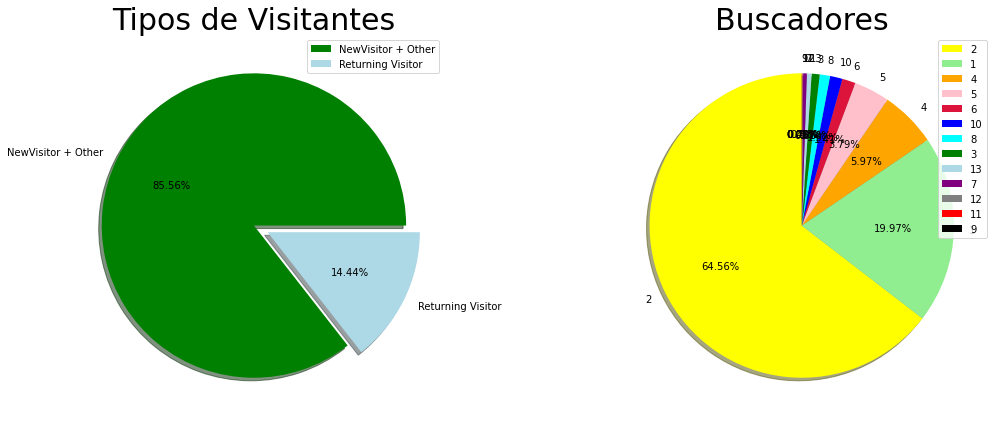

In [34]:
# Gráfico de pastel para los tipos de visitantes "VisitorTypes".
plt.rcParams['figure.figsize'] = (18, 7)

size = dfShoppers['VisitorType'].value_counts().tolist()
colors = ['green', 'lightblue']
labels = ['NewVisitor + Other', 'Returning Visitor']
explode = [0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Tipos de Visitantes', fontsize = 30)
plt.axis('off')
plt.legend()

# Gráfico de pastel para los diferentes buscadores "Browser".
size = df1['Browser'].value_counts().tolist()
colors = ['yellow','lightgreen','orange','pink','crimson','blue','cyan','green','lightblue','purple','grey','red','black']
labels = ['2','1','4','5','6','10','8','3','13','7','12','11','9']
#colors = ['yellow','lightgreen']
#labels = ['No usan','Usan']
#explode = [0, 0.1]
plt.subplot(1, 2, 2)
#plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Buscadores', fontsize = 30)
plt.axis('off')
plt.legend()

plt.show()

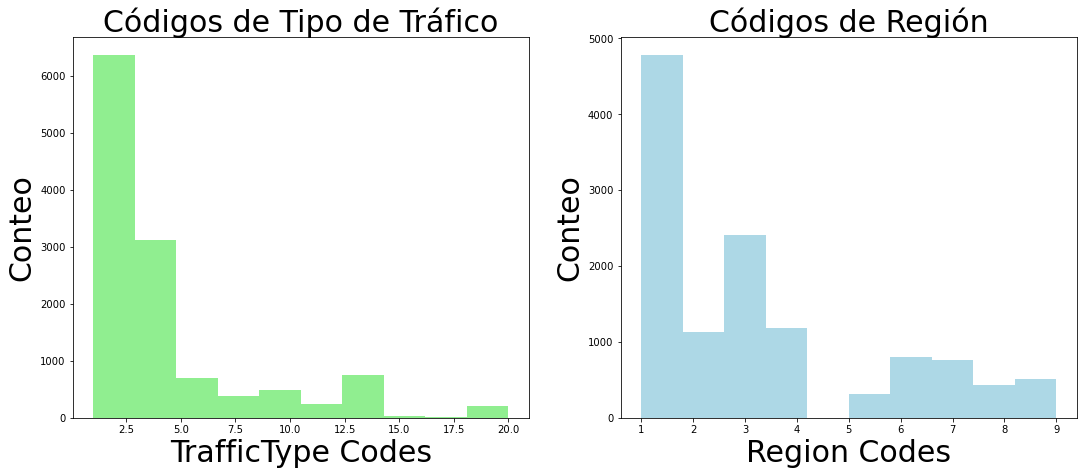

In [35]:
# Distribución de los Códigos de Tipo de Tráfico "TrafficType Codes".
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(df1['TrafficType'], color = 'lightgreen')
plt.title('Códigos de Tipo de Tráfico',fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 30)
plt.ylabel('Conteo', fontsize = 30)

# Distribución de los Códigos de Región "Region Codes".
plt.subplot(1, 2, 2)
plt.hist(df1['Region'], color = 'lightblue')
plt.title('Códigos de Región',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 30)
plt.ylabel('Conteo', fontsize = 30)

plt.show()

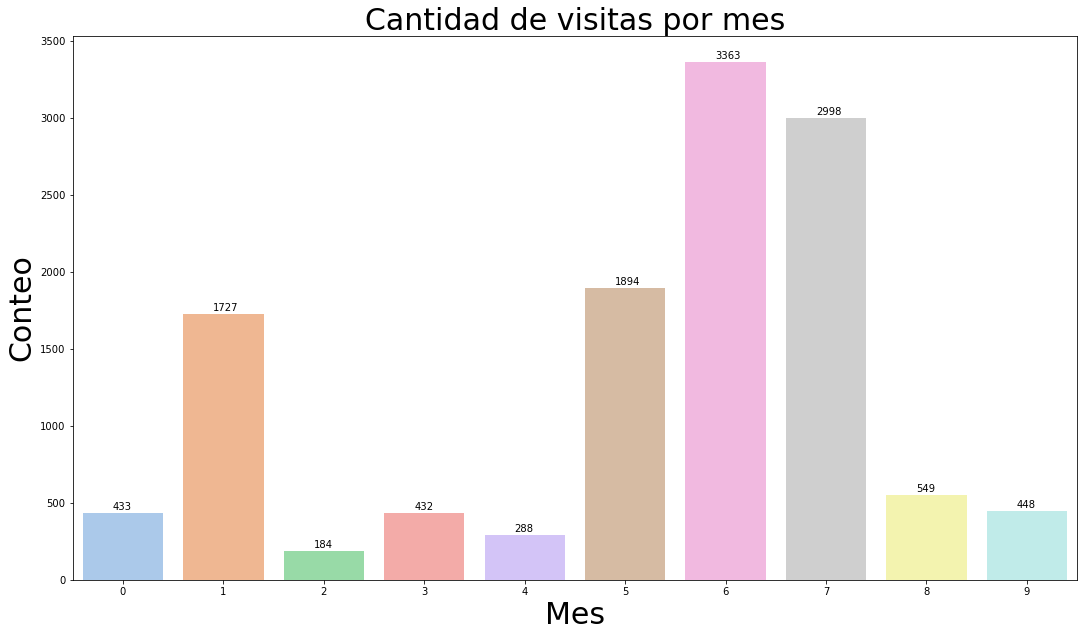

In [36]:
# Distribución de las visitas a paginas web por meses "Month".
i = 1.0
yOff = 20

plt.figure(figsize = (18,10))

MonthName = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
MonthVal = [433,1727,184,432,288,1894,3363,2998,549,448]  

plt.bar(MonthName, MonthVal, width = 0.9, align = 'center', color = 'white')
sns.countplot(df['Month'], palette = 'pastel')

for i in range(len(MonthName)):
    plt.annotate(MonthVal[i], (-0.1 + i, MonthVal[i] + yOff))
    
plt.title("Cantidad de visitas por mes", fontsize=30)
plt.xlabel('Mes', fontsize = 30)
plt.ylabel('Conteo', fontsize = 30)
plt.savefig('MonthGrafique.png')
plt.show()

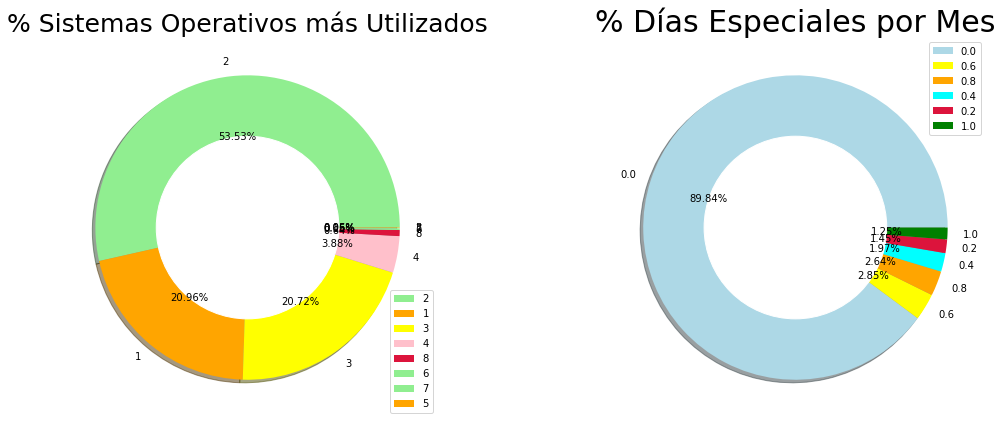

In [37]:
# Concentración de los diferentes Sistemas Operativos de los Usuarios.
size = df1['OperatingSystems'].value_counts().tolist()
colors = ['lightgreen', 'orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = '2','1','3','4','8','6','7','5'
explode = [0,0,0,0,0,0,0,0]
circle = plt.Circle((0, 0), 0.6, color = 'white')
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('% Sistemas Operativos más Utilizados', fontsize = 25)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

# Concentración de los Días Especiales "Special Days" por meses.
size = df['SpecialDay'].value_counts().tolist()
colors = ['lightblue','yellow','orange','cyan','crimson','green']
labels = ['0.0','0.6','0.8','0.4','0.2','1.0']
explode = [0,0,0,0,0,0]
circle = plt.Circle((0, 0), 0.6, color = 'white')
plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('% Días Especiales por Mes', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()

Análisis bivariable

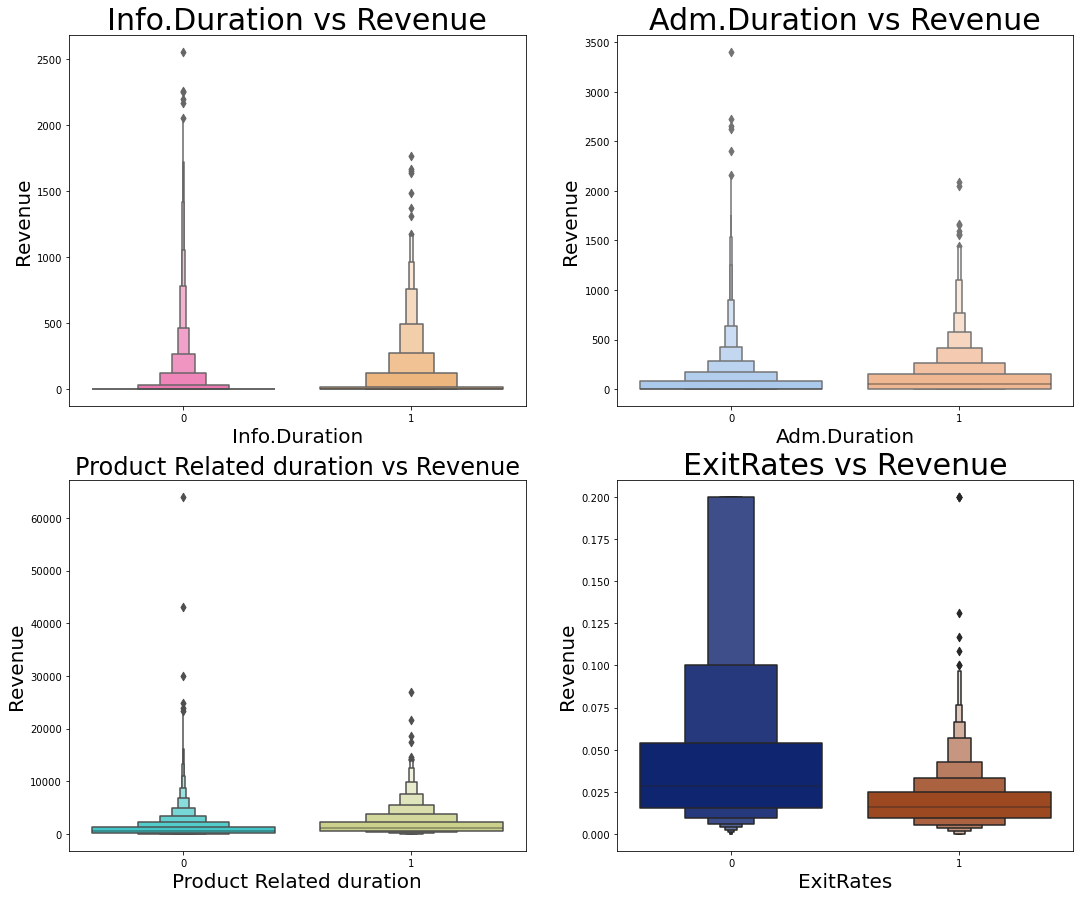

In [38]:
# Comparación entre Informational_Duration vs. Revenue
plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(2, 2, 1)
sns.boxenplot(df['Revenue'], df['Informational_Duration'], palette = 'spring')
plt.title('Info.Duration vs Revenue', fontsize = 30)
plt.xlabel('Info.Duration', fontsize = 20)
plt.ylabel('Revenue', fontsize = 20)

# Comparación entre Administrative_Duration vs. Revenue
plt.subplot(2, 2, 2)
sns.boxenplot(df['Revenue'], df['Administrative_Duration'], palette = 'pastel')
plt.title('Adm.Duration vs Revenue', fontsize = 30)
plt.xlabel('Adm.Duration', fontsize = 20)
plt.ylabel('Revenue', fontsize = 20)

# Comparación entre ProductRelated_Duration vs. Revenue
plt.subplot(2, 2, 3)
sns.boxenplot(df['Revenue'], df['ProductRelated_Duration'], palette = 'rainbow')
plt.title('Product Related duration vs Revenue', fontsize = 24)
plt.xlabel('Product Related duration', fontsize = 20)
plt.ylabel('Revenue', fontsize = 20)

# Comparación entre ExitRates vs. Revenue
plt.subplot(2, 2, 4)
sns.boxenplot(df['Revenue'], df['ExitRates'], palette = 'dark')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 20)
plt.ylabel('Revenue', fontsize = 20)

plt.show()

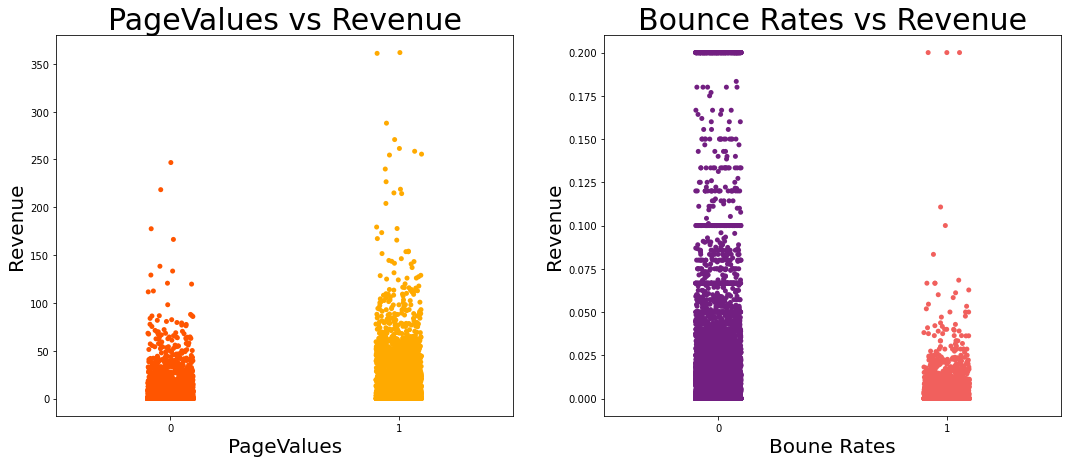

In [39]:
# Comparación entre PageValues vs. Revenue
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.stripplot(df['Revenue'], df['PageValues'], palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 20)
plt.ylabel('Revenue', fontsize = 20)

# Comparación entre Bounce Rates vs. Revenue
plt.subplot(1, 2, 2)
sns.stripplot(df['Revenue'], df['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 20)
plt.ylabel('Revenue', fontsize = 20)

plt.show()

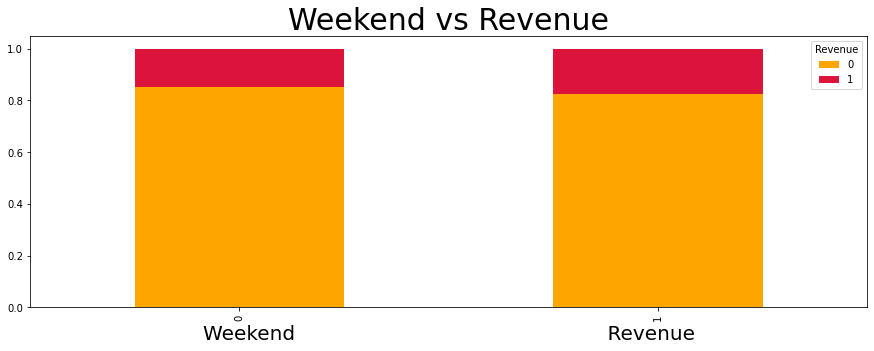

In [40]:
# Comparación entre Weekend vs. Revenue
df11 = pd.crosstab(df['Weekend'], df['Revenue'])
df11.div(df11.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.xlabel('Weekend                                                 Revenue', fontsize = 20)

plt.show()

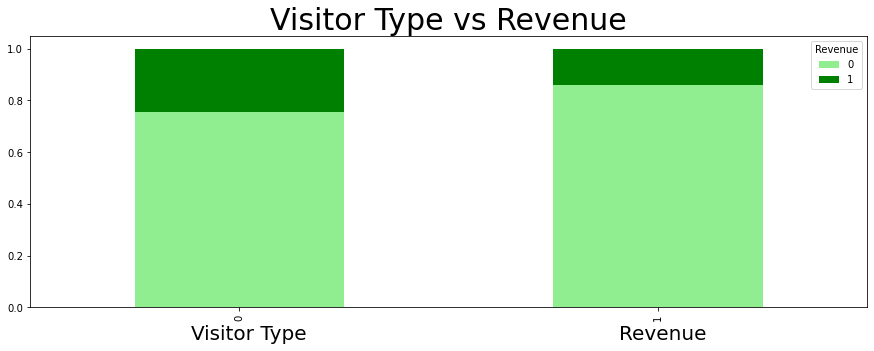

In [41]:
# Comparación entre VisitorType vs. Revenue
df2 = pd.crosstab(df['VisitorType'], df['Revenue'])
df2.div(df2.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.xlabel('Visitor Type                                                 Revenue', fontsize = 20)

plt.show()

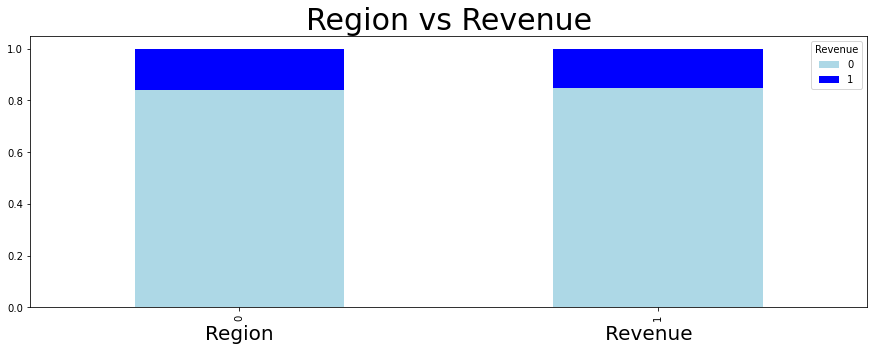

In [42]:
# Comparación entre Region vs. Revenue
df3 = pd.crosstab(df['Region'], df['Revenue'])
df3.div(df3.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Region vs Revenue', fontsize = 30)
plt.xlabel('Region                                                    Revenue', fontsize = 20)

plt.show()

Text(0.5, 1.0, 'LM Plot entre Admistrativo e Informativo')

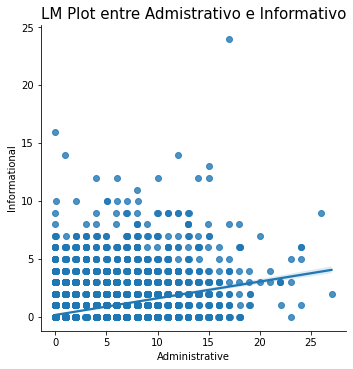

In [43]:
# LM plot 
plt.rcParams['figure.figsize'] = (30, 30)
sns.lmplot(x = 'Administrative', y = 'Informational', data = df, x_jitter = 0.05)
plt.title('LM Plot entre Admistrativo e Informativo', fontsize = 15)

Análisis multivariable

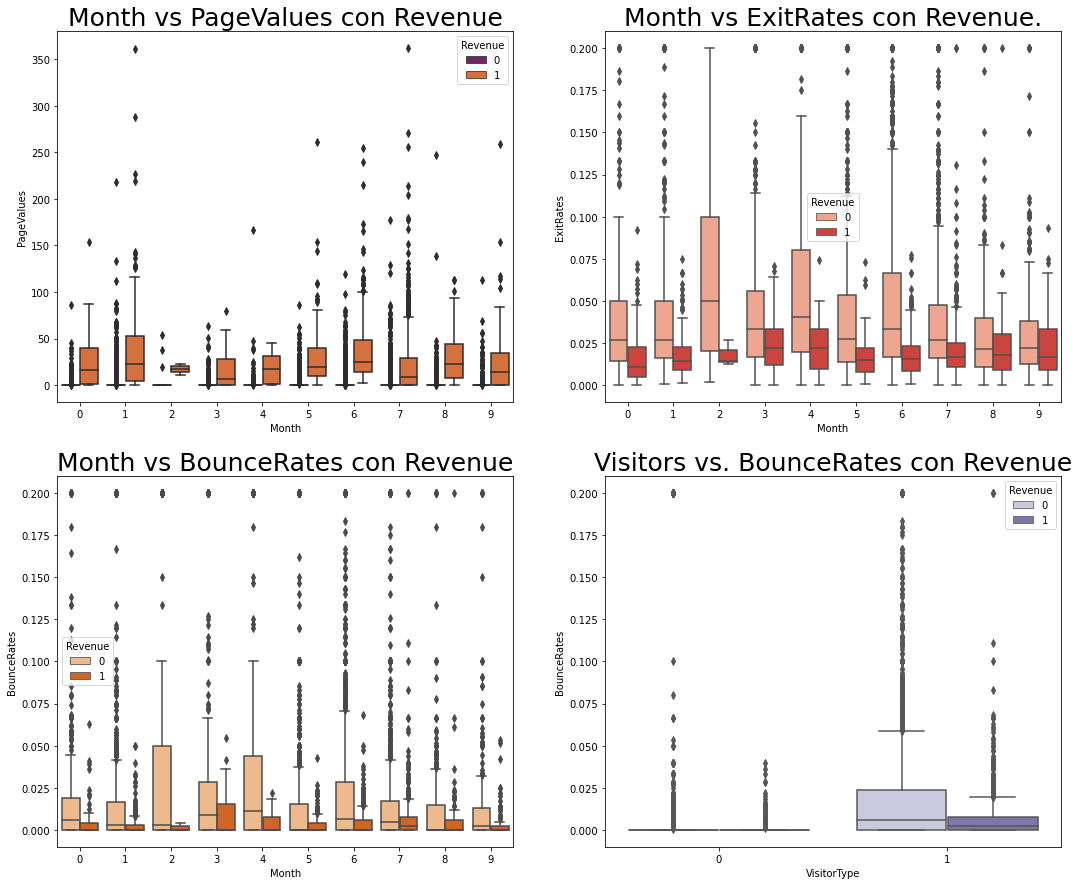

In [44]:
# Comparación entre Month vs. PageValues con Revenue
plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(2, 2, 1)
sns.boxplot(x = df['Month'], y = df['PageValues'], hue = df['Revenue'], palette = 'inferno')
plt.title('Month vs PageValues con Revenue', fontsize = 25)

# Comparación entre Month vs. ExitRates con Revenue
plt.subplot(2, 2, 2)
sns.boxplot(x = df['Month'], y = df['ExitRates'], hue = df['Revenue'], palette = 'Reds')
plt.title('Month vs ExitRates con Revenue.', fontsize = 25)

# Comparación entre Month vs BounceRates con Revenue
plt.subplot(2, 2, 3)
sns.boxplot(x = df['Month'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Oranges')
plt.title('Month vs BounceRates con Revenue', fontsize = 25)

# Comparación entre VisitorType vs. BounceRates con Revenue
plt.subplot(2, 2, 4)
sns.boxplot(x = df['VisitorType'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Purples')
plt.title('Visitors vs. BounceRates con Revenue', fontsize = 25)

plt.show()

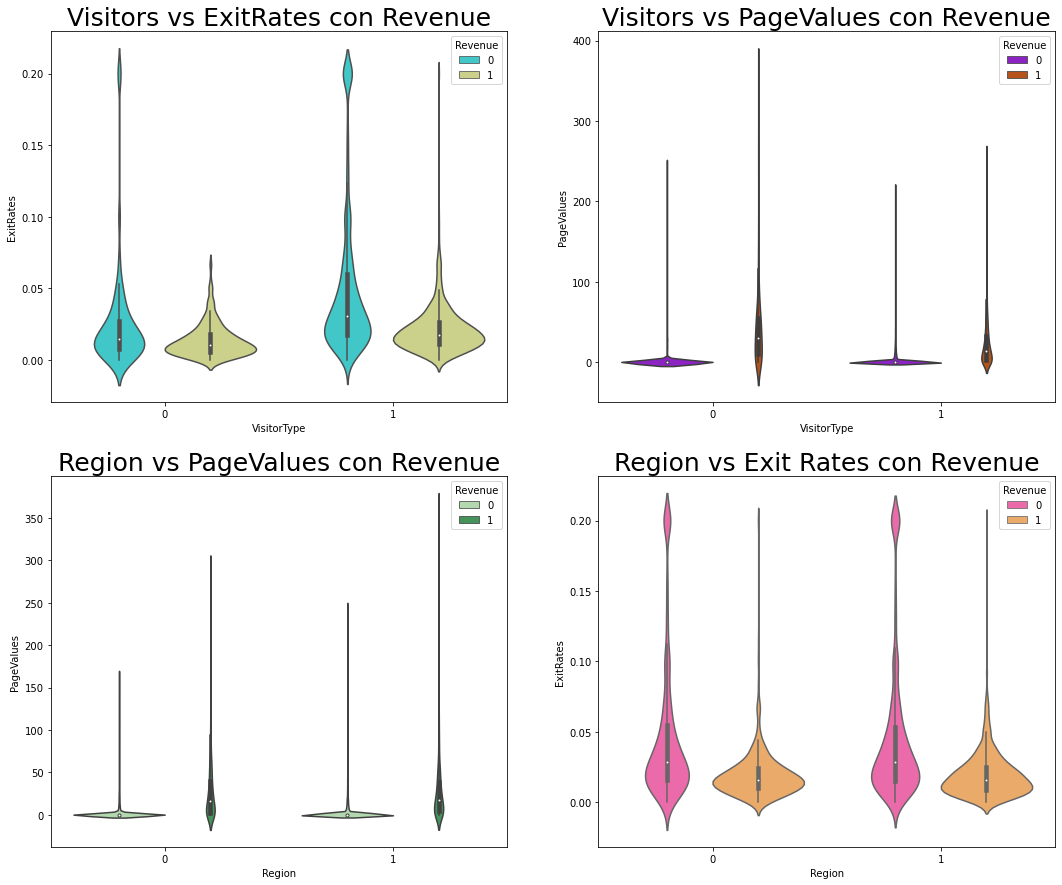

In [45]:
# Comparación entre VisitorType vs. ExitRates con Revenue
plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(2, 2, 1)
sns.violinplot(x = df['VisitorType'], y = df['ExitRates'], hue = df['Revenue'], palette = 'rainbow')
plt.title('Visitors vs ExitRates con Revenue', fontsize = 25)

# Comparación entre VisitorType vs. PageValues con Revenue
plt.subplot(2, 2, 2)
sns.violinplot(x = df['VisitorType'], y = df['PageValues'], hue = df['Revenue'], palette = 'gnuplot')
plt.title('Visitors vs PageValues con Revenue', fontsize = 25)

# Comparación entre Region vs. PageValues con Revenue
plt.subplot(2, 2, 3)
sns.violinplot(x = df['Region'], y = df['PageValues'], hue = df['Revenue'], palette = 'Greens')
plt.title('Region vs PageValues con Revenue', fontsize = 25)

# Comparación entre Region vs. ExitRates con Revenue
plt.subplot(2, 2, 4)
sns.violinplot(x = df['Region'], y = df['ExitRates'], hue = df['Revenue'], palette = 'spring')
plt.title('Region vs Exit Rates con Revenue', fontsize = 25)

plt.show()

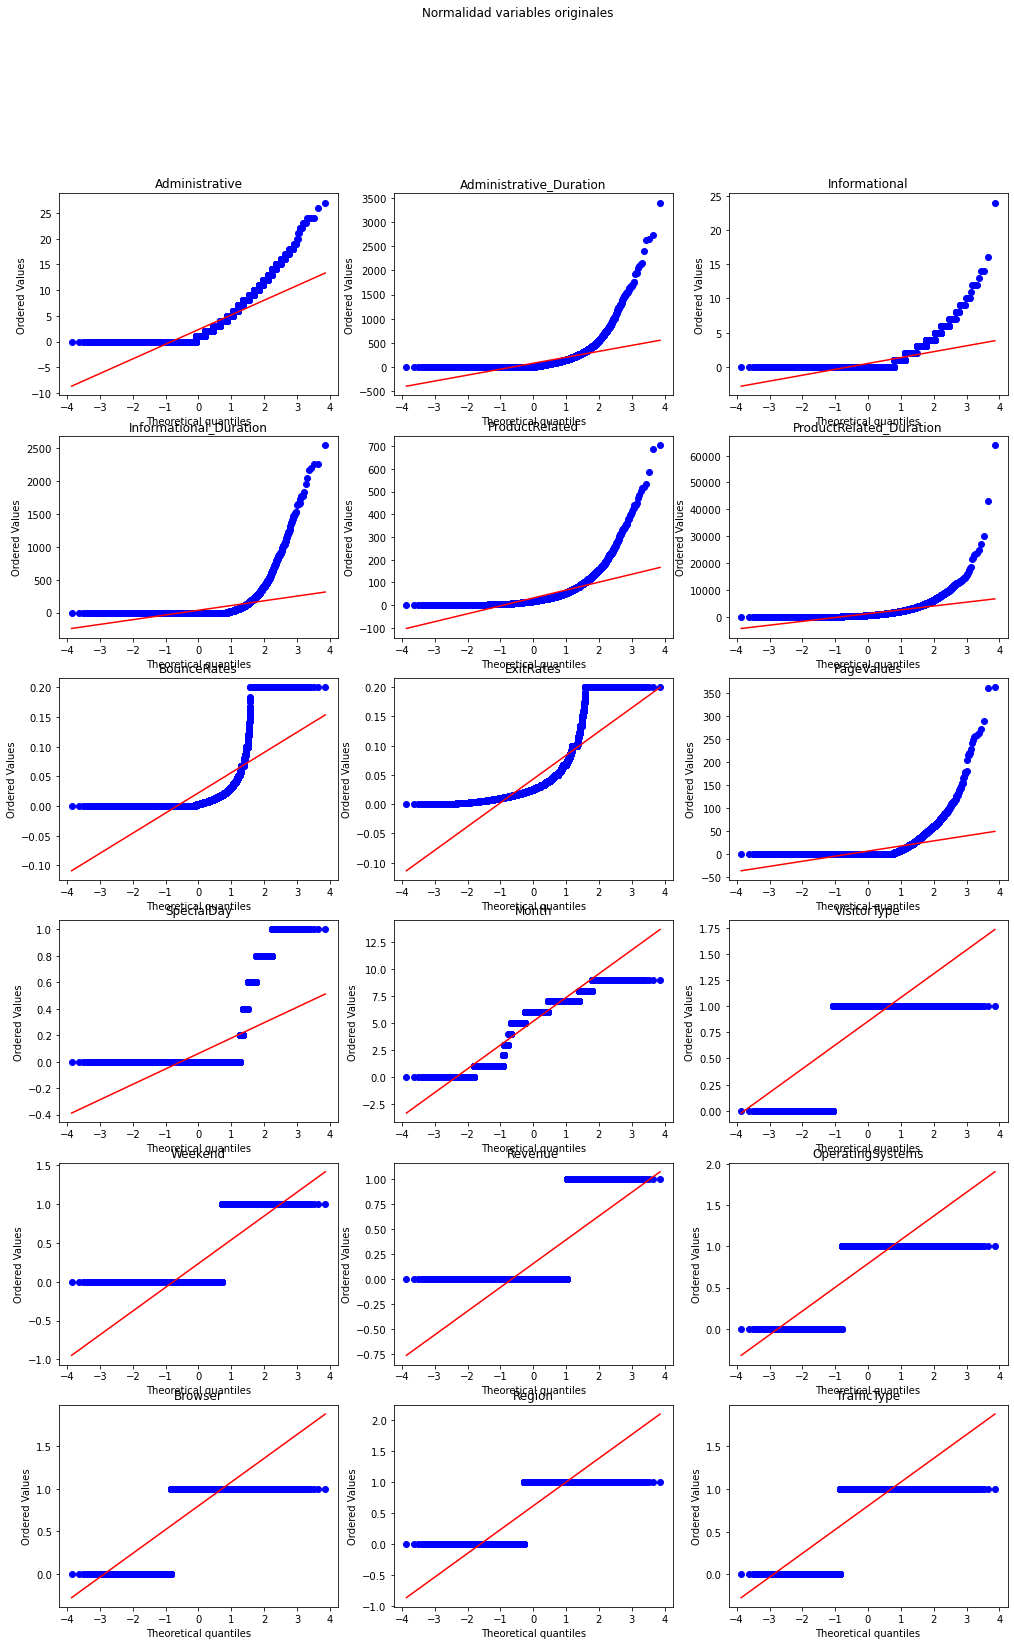

In [46]:
# Q-Q Plot gráfico que compara entre dos distribuciones. Cada una de las variables con una distribución normal. 
# Si siguen la misma distribución, los puntos caen cerca de la línea roja.

# Vemos que ninguna de las variables tiene una distribucion normal.
shapiro_test = comprueba_normalidad(df, title='Normalidad variables originales')

In [47]:
# El Test de Shapiro-Wilk: El p-value es menor a un nivel de significancia 𝛼. 
# Se concluye que la distribución no proviene de una normal.
shapiro_test

,Test Statistic,p-value
Administrative,0.734761,0.0
Administrative_Duration,0.481945,0.0
Informational,0.458445,0.0
Informational_Duration,0.259956,0.0
ProductRelated,0.610546,0.0
ProductRelated_Duration,0.555168,0.0
BounceRates,0.491913,0.0
ExitRates,0.698974,0.0
PageValues,0.355311,0.0
SpecialDay,0.343257,0.0


#### Normalizamos los datos
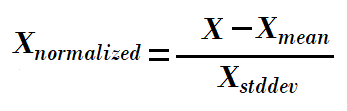

In [48]:
# Normalizamos los datos en un nuevo DataFrame "X_norma"
X_norm = (X - X.mean()) / X.std()
X_norm[:5]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Weekend,OperatingSystems,Browser,Region,TrafficType
0,-0.697553,-0.457476,-0.396615,-0.24505,-0.691473,-0.624769,3.672477,3.235240,-0.317363,-0.309001,-1.334201,0.410877,-0.550561,-1.941556,-2.002053,-1.256853,-2.009714
1,-0.697553,-0.457476,-0.396615,-0.24505,-0.668997,-0.591338,-0.457439,1.174544,-0.317363,-0.309001,-1.334201,0.410877,-0.550561,0.515009,0.499447,-1.256853,0.497543
2,-0.697553,-0.457476,-0.396615,-0.24505,-0.691473,-0.624769,3.672477,3.235240,-0.317363,-0.309001,-1.334201,0.410877,-0.550561,0.515009,-2.002053,0.795574,0.497543
3,-0.697553,-0.457476,-0.396615,-0.24505,-0.668997,-0.623376,0.575040,1.998823,-0.317363,-0.309001,-1.334201,0.410877,-0.550561,0.515009,0.499447,0.795574,0.497543
4,-0.697553,-0.457476,-0.396615,-0.24505,-0.489182,-0.296985,-0.044447,0.144196,-0.317363,-0.309001,-1.334201,0.410877,1.816180,0.515009,0.499447,-1.256853,0.497543


Text(0.5, 0, 'X')

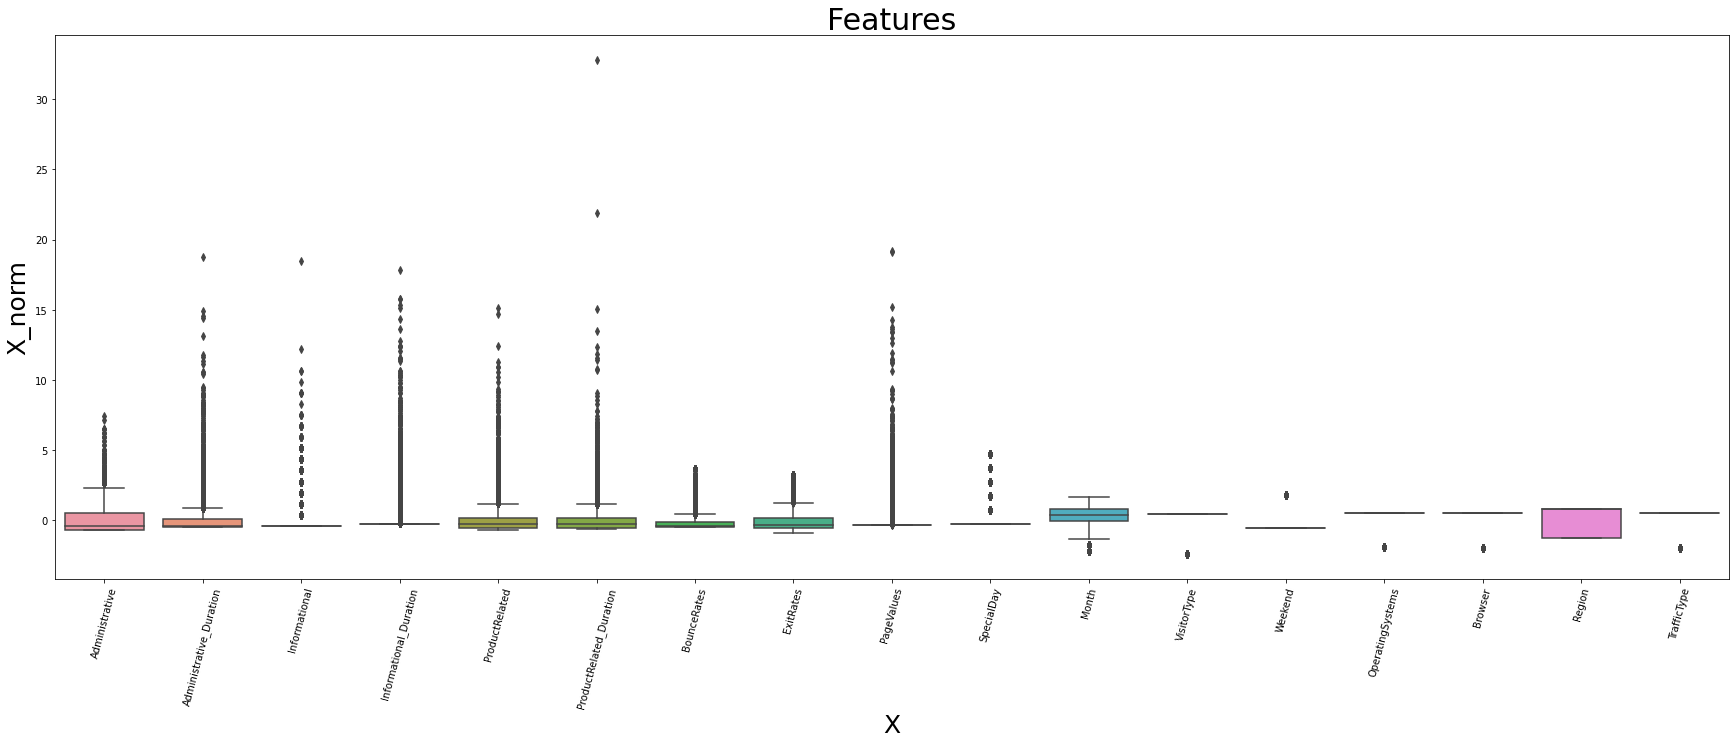

In [49]:
# Gráfico de cajas utilizando las variables normalizadas "X_norma".
plt.figure(figsize = (30,10))
ax = sns.boxplot(data = X_norm)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75)
plt.title('Features', size = 30)
plt.ylabel('X_norm', size = 25)
plt.xlabel('X', size = 25)

# Vemos que totas las variables tienen algun valor OUTLIER.

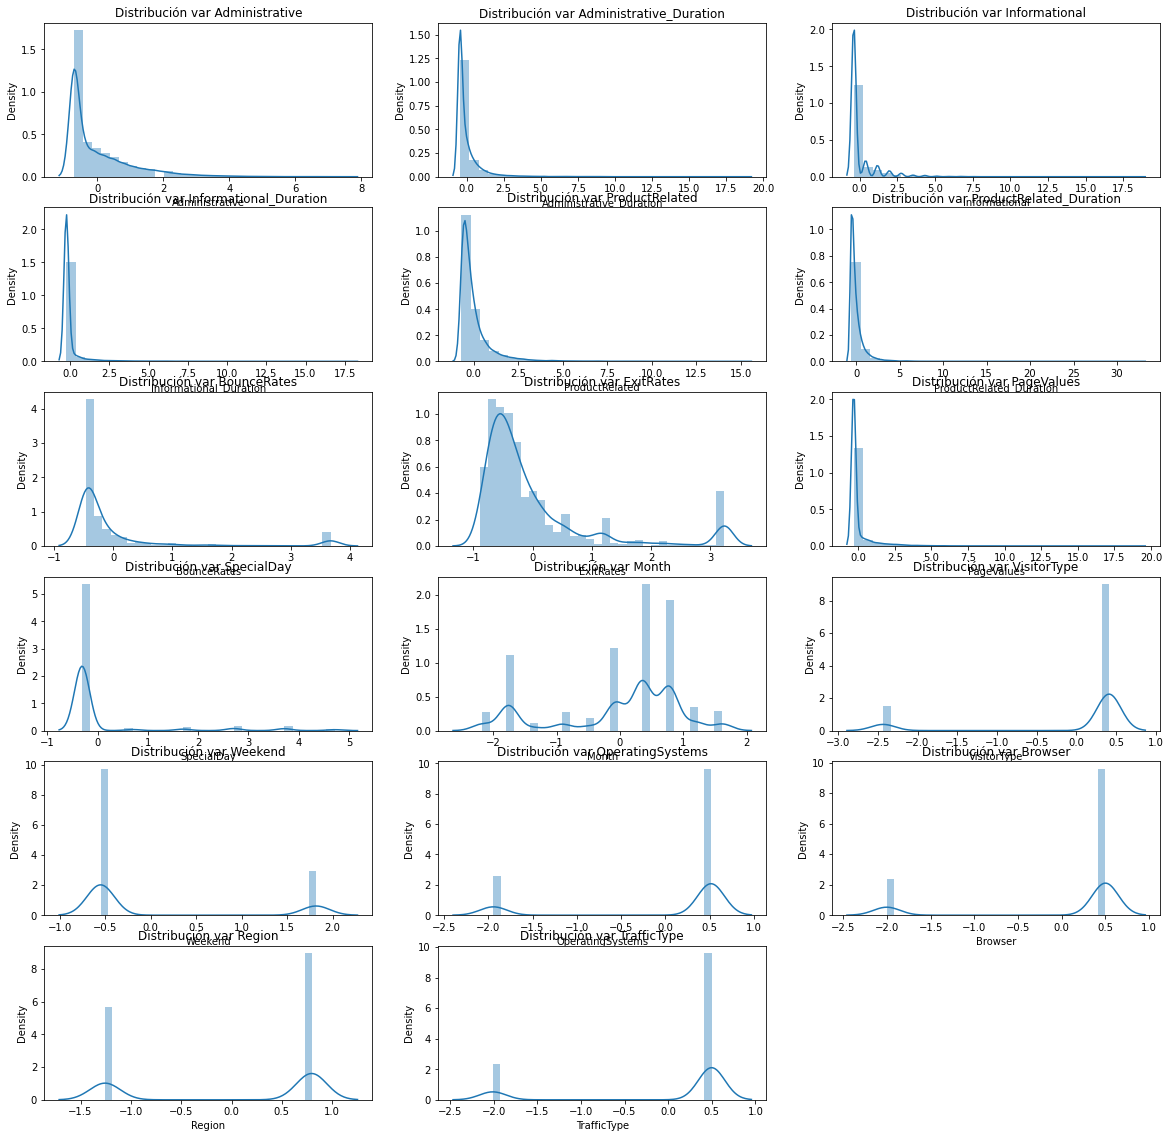

In [50]:
# Las variables no siguen distribuciones Normales o Gaussianas, como vemos en los histogramas.
plt.figure(figsize=(20,30))
for i, column in enumerate(X_norm.columns):
    plt.subplot(9, 3, i+1)
    sns.distplot(X_norm[column], bins=30)
    plt.title('Distribución var {}'.format(column))
plt.show()

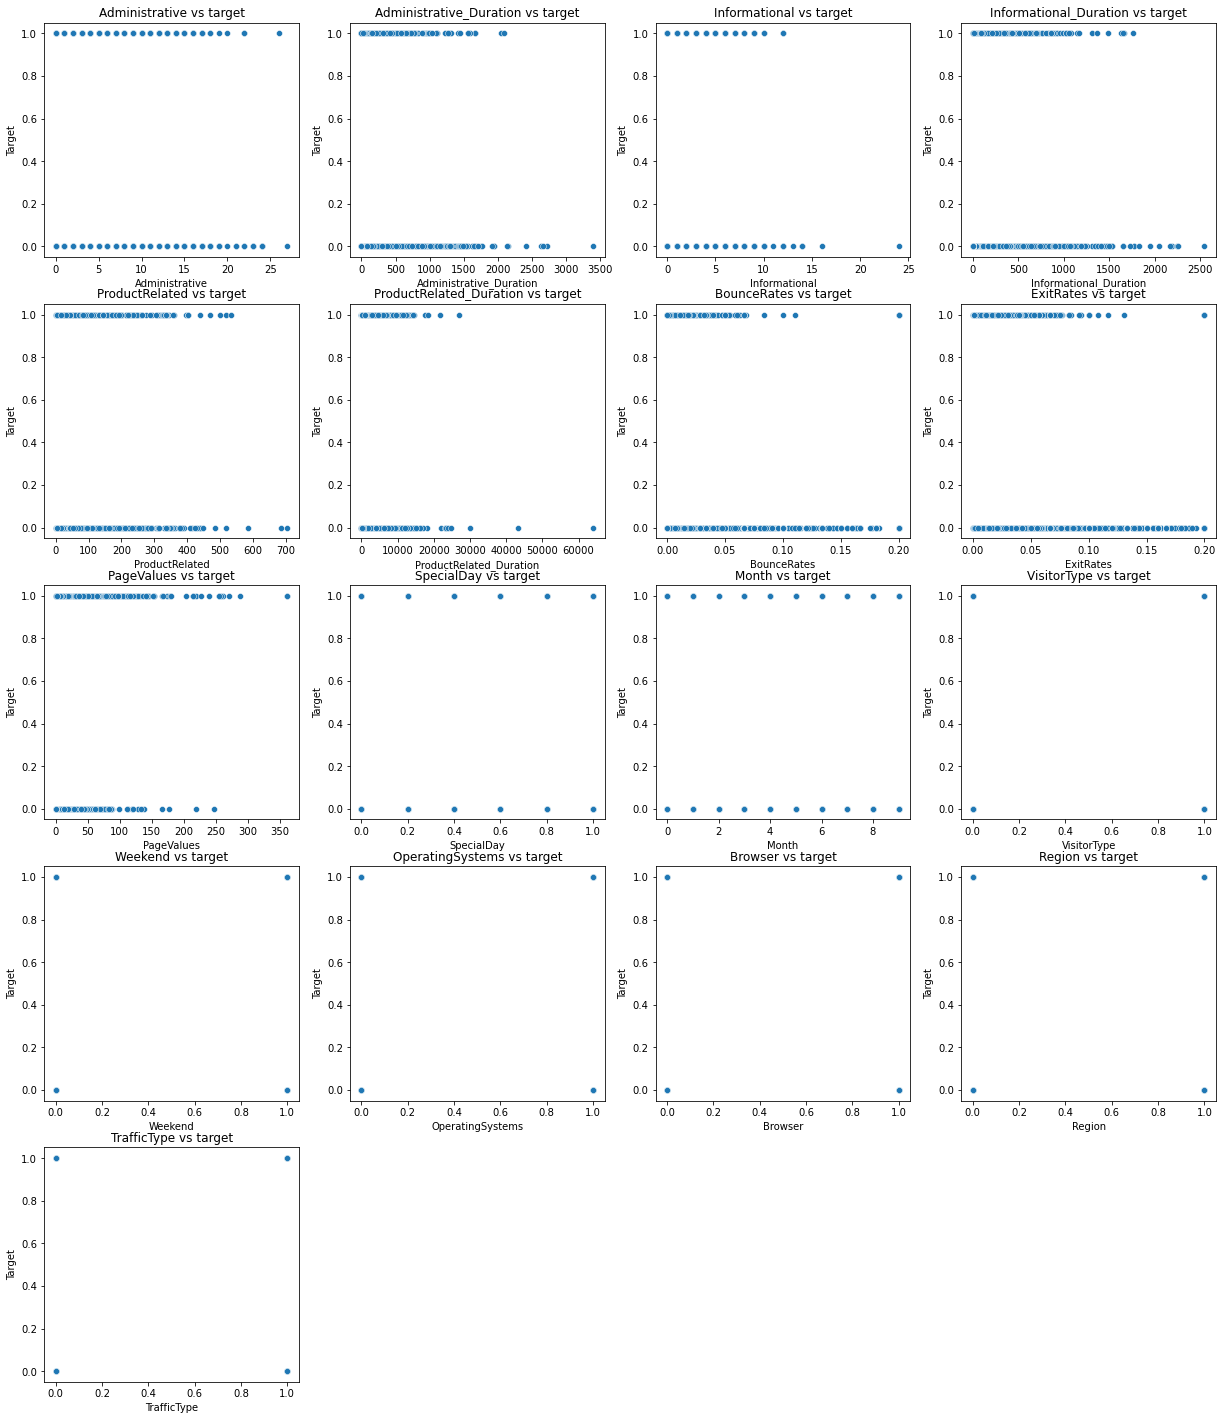

In [51]:
# Relación entre las Features "X" y la Target "Y".
relaciones_vs_target(X, Y)

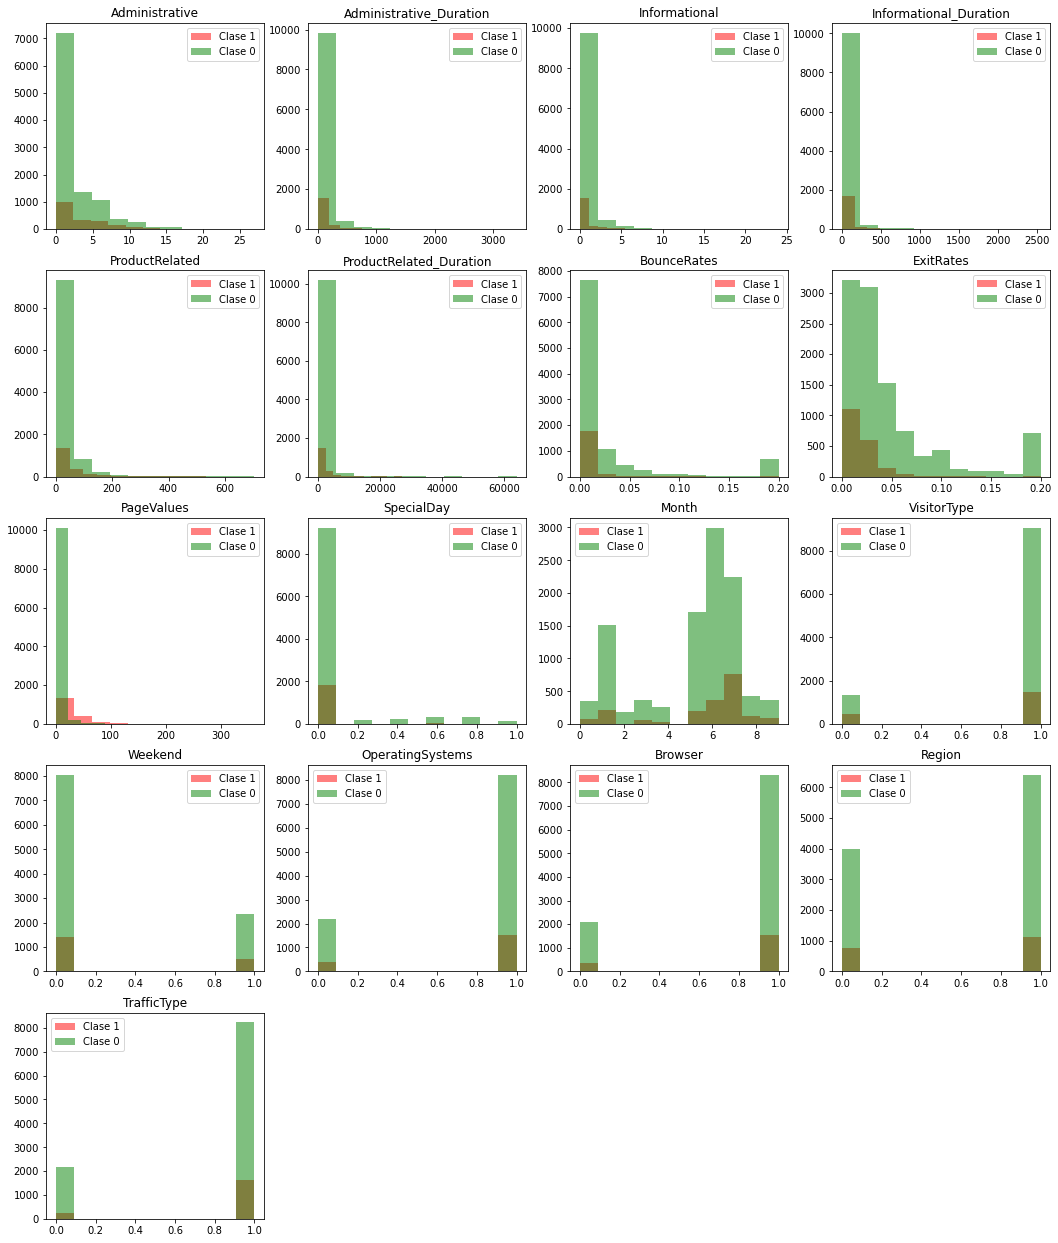

In [52]:
# Histogramas separando las Features "X" por el valor de la Target "Y".
hist_pos_neg_feat(X, Y)

Text(0.5, 1.0, 'Matriz de correlaciones de Pearson')

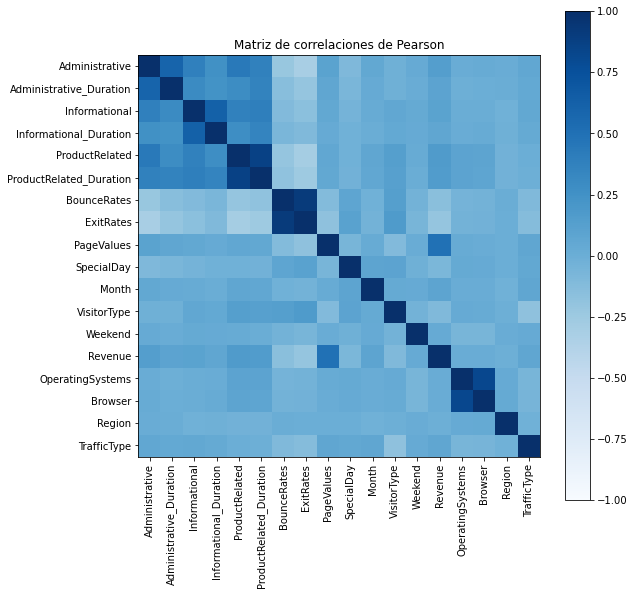

In [53]:
# Matriz de correlaciones del DataFrame.
matriz_corr = df.corr(method = 'pearson')
n_ticks = len(df.columns)
plt.figure( figsize = (9, 9) )
plt.xticks(range(n_ticks), df.columns, rotation = 'vertical')
plt.yticks(range(n_ticks), df.columns)
plt.colorbar(plt.imshow(matriz_corr, interpolation = 'nearest', 
                            vmin = -1., vmax = 1., 
                            cmap = plt.get_cmap('Blues')))
plt.title('Matriz de correlaciones de Pearson')

In [54]:
# Features "X" con mayor correlación con la Target "Y".
correlaciones_target = matriz_corr.values[ -1, : -1]
indices_inversos =  abs(correlaciones_target[ : ]).argsort()[ : : -1]
diccionario = {}
for nombre, correlacion in zip(df.columns[indices_inversos], list(correlaciones_target[indices_inversos])):
    diccionario[nombre] = correlacion
pd.DataFrame.from_dict(diccionario, orient = 'index', columns = ['Correlación con "Y"'])

# Vemos que ninguna Feature "X" tiene una fuerte relación con el Target "Y".

,"Correlación con ""Y"""
VisitorType,-0.178964
ExitRates,-0.128391
BounceRates,-0.102793
Month,0.069971
OperatingSystems,-0.066206
Revenue,0.065620
PageValues,0.065110
Browser,-0.062116
Administrative,0.060212
SpecialDay,0.051251


## Estandarización de los datos.

In [55]:
# Estandarizar "X" con la libreria StandardScaler y tendremos X_stand
obj_escalar = StandardScaler()
X_stand = obj_escalar.fit_transform(X)

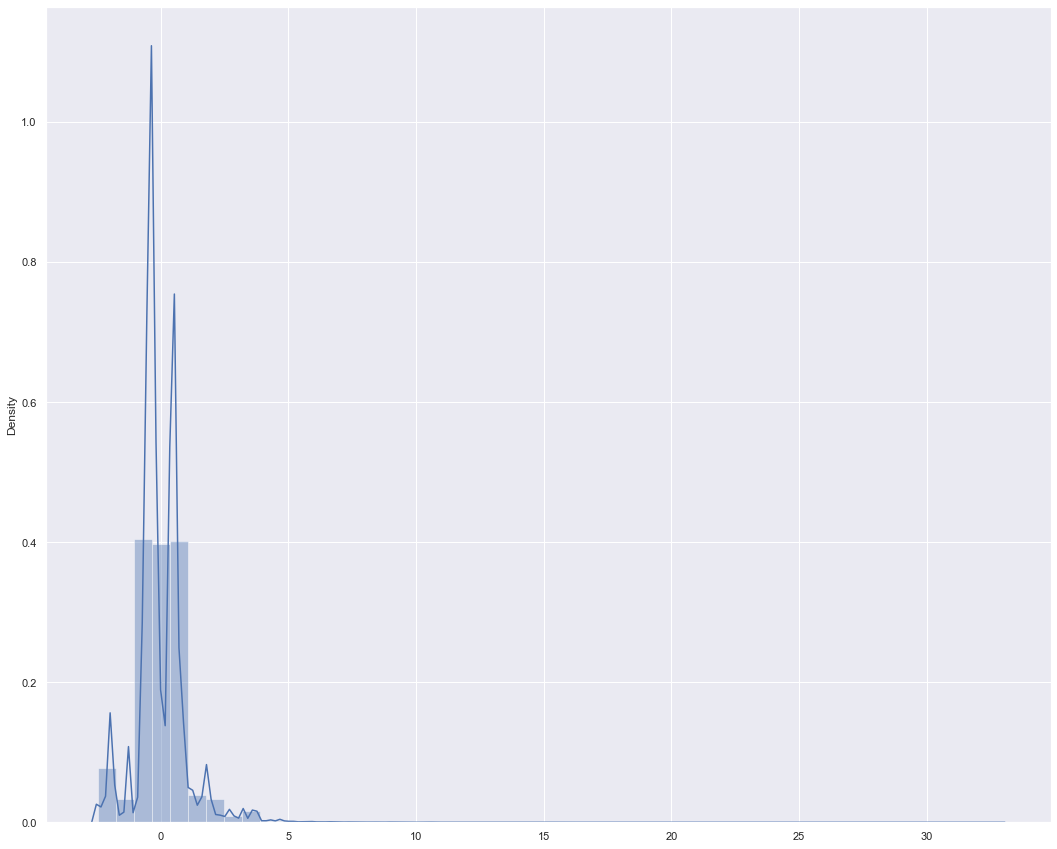

In [56]:
sns.set_theme()
x = X_stand
ax = sns.distplot(x)

## Dividimos los datos en **"Train"** y **"Test"**.
El conjunto de **Train** es aquel al que se ajusta el modelo de aprendizaje automático.

El conjunto de **Test** no se usa en todo el proceso hasta la parte final, simplemente para comprobar que el modelo generaliza correctamente.

El conjunto de **Validación** es el tercer conjunto y suele usarse casi siempre permite comparar modelos distintos y escoger el que mejor se comporte.

#### Vamos a ajustar 3 modelos al conjunto **Train**, con las métricas obtenidas sobre el conjunto de **Validación** eligemos el que mejor métrica obtenga. 

#### Posteriormente, aplicaremos ese modelo a **Test** para obtener la métrica final.

In [57]:
# Dividimos los datos en "Train" y "Test"        (Con un 30% de tamaño de Test).
X_train, X_test, Y_train, Y_test = train_test_split(X_stand, Y, test_size = 0.3, random_state = 0)

In [58]:
# Revisamos las medidas
print('Dimensiones en Train \n-X:{}\n-Y:{}'.format(X_train.shape, Y_train.shape))
print('Dimensiones en Test \n-X:{}\n-Y:{}'.format(X_test.shape, Y_test.shape))

# Ajuste de una Regresión Logística a Train
clf = LogisticRegression()
clf.fit(X_train, Y_train)
print('Parametros de la Regresión Logística \n- Interceptor: {} \n- Coeficientes: {}'.format(clf.intercept_, clf.coef_))

# Predicción del conjunto de Test
y_test_pred = clf.predict(X_test)
y_test_proba = clf.predict_proba(X_test)
print('Ejemplo de Predicción: {}'.format(y_test_proba[:1]))

Dimensiones en Train 
-X:(8621, 17)
-Y:(8621,)
Dimensiones en Test 
-X:(3695, 17)
-Y:(3695,)
Parametros de la Regresión Logística 
- Interceptor: [-2.23462838] 
- Coeficientes: [[-0.00199739 -0.01241121  0.04287413 -0.00832832  0.13806517  0.11120737
  -0.17058232 -0.74733496  1.45760569 -0.16526978  0.19757428 -0.10649065
   0.08321177 -0.0510677   0.03977487 -0.04405684  0.04561719]]
Ejemplo de Predicción: [[0.93929756 0.06070244]]


#### Con los datos de **Train** se pretende ajustar modelos con **CrossValidation y GridSearch**.

1) Utilizar un modelo lineal. (regresiones logísticas, las regresiones lineales, etc.)

2) Utilizar un modelo de redes neuronales.

3) Utilizar cualquier otro modelo de clasificación.

### 1) Aplicamos un modelo de Regresión Logística

Con GridSearchCV se realiza una optimización.

Esta función lo que hace es ajustar el modelo que se pasa como argumento con todas las combinaciones posibles de los parámetros.

En este caso, todas las combinaciones de C y class_weights.

#### Optimizando C y class_weight con GridSearch 

In [59]:
# Optimiza al menos dos parámetros del modelo. La métrica a optimizar queremos que sea la roc_auc
modelo1 = LogisticRegression()
parametros1 = {"C": [0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09], 'class_weight':['balanced', None]}
modelo_rl = GridSearchCV(modelo1, param_grid = parametros1, cv = 5, scoring = 'roc_auc')
modelo_rl.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                               0.08, 0.09],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [60]:
print(modelo_rl.best_params_, "\nROC AUC: {}".format(round(modelo_rl.best_score_, 4)))

{'C': 0.09, 'class_weight': 'balanced'} 
ROC AUC: 0.8883


### 2) Aplicamos un modelo de Redes Neurolanes

En este problema vamos a hacer uso de la librería sklearn. Esta librería cuenta con un clasificador llamado MLPClassifier, el cual es lo que se denomina un Multi-layer Perceptron Classifier.

Esta es la configuración más común y estándard de las redes neuronales. Cuentan con una capa de entrada, una de salida y múltiples capas ocultas. Se trata de una arquitectura de red neuronal fully-connected, es decir, las neuronas de cada capa se conectan a todas las neuronales de las capas anteriores y de las siguientes. En la imagen a continuación podéis ver un ejemplo de este tipo de redes neuronales.

In [61]:
modelo2 = MLPClassifier()
parametros2 = {'solver': ['lbfgs'], 
              'max_iter': [100, 200, 300, 500], # Iteraciones máximas en cada red
              'alpha': 10.0 ** -np.arange(1, 3), # Parámetro de regularización L2 para evitar sobreajuste
              'hidden_layer_sizes':np.arange(30, 35), # Número de neuronas en cada capa
              'random_state':[0]}

In [62]:
# Vamos a utilizar la librería GridSearchCV
modelo_rn = GridSearchCV(modelo2, param_grid = parametros2, cv = 3, scoring = 'roc_auc', n_jobs = -1, verbose = 10)
modelo_rn.fit(X_train, Y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': array([0.1 , 0.01]),
                         'hidden_layer_sizes': array([30, 31, 32, 33, 34]),
                         'max_iter': [100, 200, 300, 500], 'random_state': [0],
                         'solver': ['lbfgs']},
             scoring='roc_auc', verbose=10)

In [63]:
print(modelo_rn.best_params_, "\nROC AUC: {}".format(round(modelo_rn.best_score_, 4)))

{'alpha': 0.1, 'hidden_layer_sizes': 33, 'max_iter': 100, 'random_state': 0, 'solver': 'lbfgs'} 
ROC AUC: 0.8821


### 3) Aplicamos un modelo de clasificación

In [64]:
# Optimiza al menos dos parámetros del modelo. La métrica a optimizar queremos que sea la ROC AUC   
modelo3 = LogisticRegression()
parametros3 = {"C": [0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09], 'class_weight':['balanced', None]}
rkf = RepeatedKFold(n_splits = 5, n_repeats = 1, random_state = 1)
modelo_cls = GridSearchCV(modelo3, param_grid = parametros3, cv = rkf, scoring = 'roc_auc')
modelo_cls.fit(X_train, Y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
             estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                               0.08, 0.09],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [65]:
# Imprimimos los mejores parametros
print(modelo_cls.best_params_, "\nROC AUC: {}".format(round(modelo_cls.best_score_, 4)))

{'C': 0.09, 'class_weight': 'balanced'} 
ROC AUC: 0.8882


### Modelo 1 de Regresión logística 
ROC AUC: 0.8883

### Modelo 2 de Redes Neuronales 
ROC AUC: 0.8821

### Modelo 3 de Clasificación 
ROC AUC: 0.8882

Vemos que tanto el modelo Regresión Logística como el de Clasificación tiene el mejor ROC AUC 
#### 0.8883.
Elegimos el primero para predecir Test y obtener una métrica estimada.

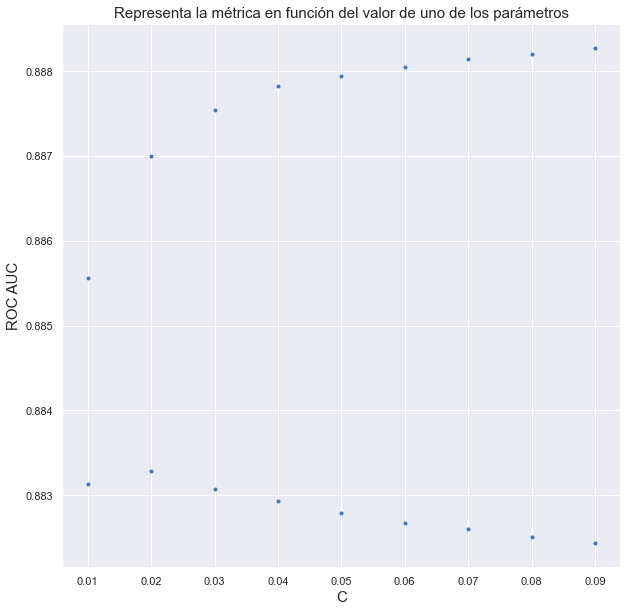

In [66]:
df_search = pd.DataFrame.from_dict(modelo_rl.cv_results_)

# Representa la métrica en función del valor de uno de los parámetros
plt.figure(figsize = (10, 10))

plt.plot( df_search['param_C'], df_search['mean_test_score'], '.')
plt.title('Representa la métrica en función del valor de uno de los parámetros', size = 15)
plt.xlabel('C', size = 15)
plt.ylabel('ROC AUC', size = 15)
plt.show()

#### Analizando el modelo con el mejor alpha 

In [67]:
# En este paso nos quedamos con los mejores parámetros obtenidos en el paso anterior.
reg_log =  LogisticRegression(C = modelo_rl.best_params_['C'], class_weight = modelo_rl.best_params_['class_weight'])

# Ajusto a todos los datos de entrenamiento.
reg_log.fit(X_train, Y_train)

LogisticRegression(C=0.09, class_weight='balanced')

In [68]:
# Predice las probabilidades en el conjunto de Test y calcula la métrica ROC AUC
y_test_pred_prob = reg_log.predict_proba(X_test)
# Se calcula con esta función
metrics.roc_auc_score(Y_test, y_test_pred_prob[:,1])

0.8957458561029334

#### Vemos que ahora la métrica ROC AUC ha mejorado de : 
0.8883  a  0.8957


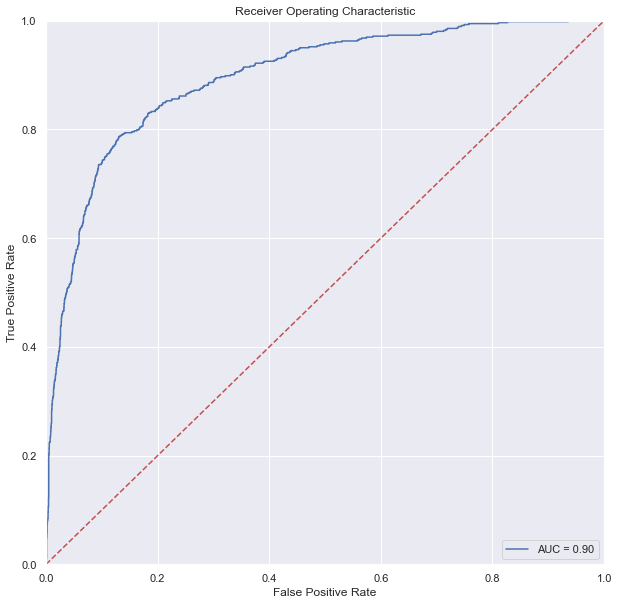

In [69]:
# Representa la curva Roc_Auc de las predicciones en Test.
preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

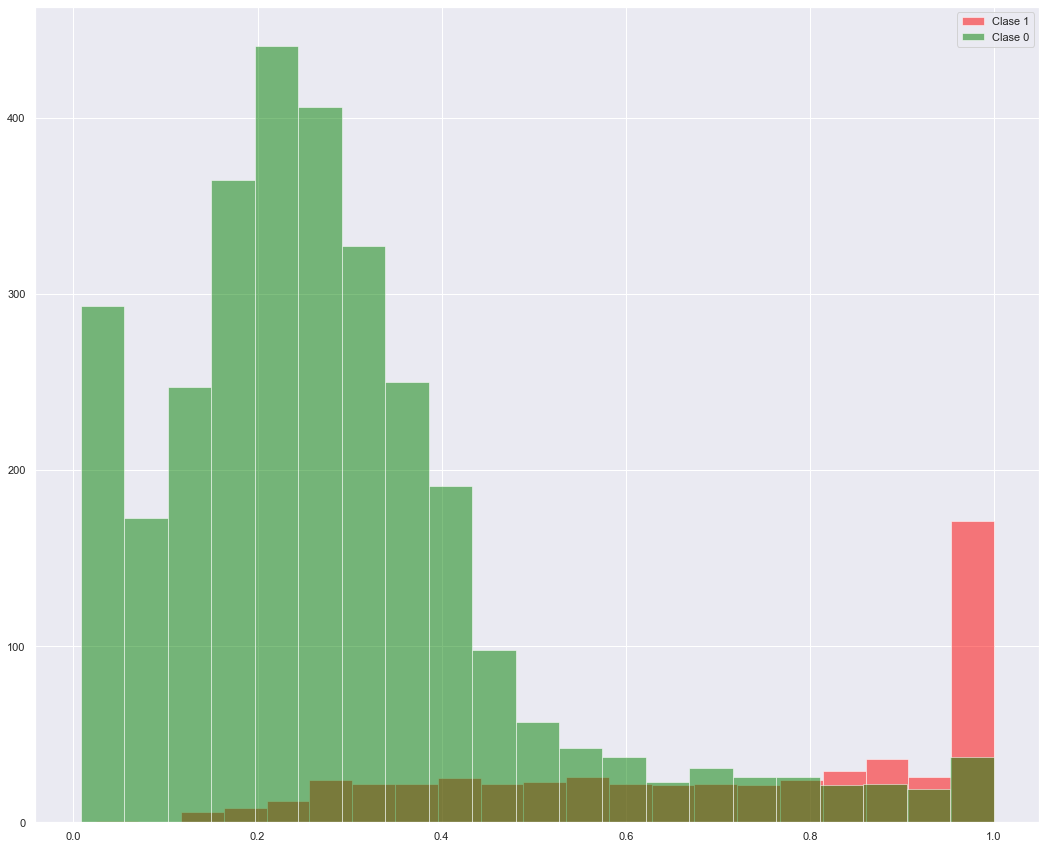

In [70]:
# Representamos los histogramas de probabilidad de las predicciones en Test.
y_test_pred_prob2 = reg_log.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob2[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob2[np.where(Y_test == 0)[0]]

represento_doble_hist(y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins = 21, density = 0)

## Umbralizamos las probabilidades utilizando el umbral que maximice el área bajo la curva ROC.

In [71]:
# Calculamos las sensitividades en función a los umbrales.
sensitividades = {}
for umbral in [0.1, 0.2, 0.3, 0.5, 0.6, 0.8]:
    y_umbralizadas = 1 * (y_test_pred_prob[:, 1] > umbral)
    sensitividades[umbral] = metrics.recall_score(Y_test, y_umbralizadas)
sensitividades

{0.1: 0.9982238010657194,
 0.2: 0.9733570159857904,
 0.3: 0.9147424511545293,
 0.5: 0.738898756660746,
 0.6: 0.650088809946714,
 0.8: 0.48134991119005327}

In [72]:
# Calculamos las precisiones en función a los umbrales.
precisiones = {}
for umbral in [0.1, 0.2, 0.3, 0.5, 0.6, 0.8, 0.9]:
    y_umbralizadas = 1 * (y_test_pred_prob[:, 1] > umbral)
    precisiones[umbral] = metrics.precision_score(Y_test, y_umbralizadas)
precisiones

{0.1: 0.17351034269836368,
 0.2: 0.2128982128982129,
 0.3: 0.3134510042604991,
 0.5: 0.5714285714285714,
 0.6: 0.6245733788395904,
 0.8: 0.7245989304812834,
 0.9: 0.7756653992395437}

In [73]:
# Calculamos las métricas accuracy, sensitividad, predición y la matriz de confusión con el umbral por defecto 0.5
y_umbralizadas = 1 * (y_test_pred_prob[:, 1] > 0.5)
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas), 4)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas), 4)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas), 4)))  

Matriz de confusión
 [[2820  312]
 [ 147  416]]

Accuracy	0.8758
Sensitividad	0.7389
Precisión	0.5714
